In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros e constantes da simulação

In [2]:
N = 10**4       # Número de momentos magnéticos
kB = 1.         # Constante de Boltzmann
T = 1.          # Temperatura
M = int(1e3)    # Número de passos de Monte Carlo da simulação
beta = 1/(kB*T)

In [3]:
B = np.linspace(-4, 4, 20)
rng = np.random.default_rng()

# Matrizes que armazenam os estados

In [4]:
# Partimos do estado uniforme -1/2
s_t = np.full((M+1,B.size,N), -.5)  
# escolhemos alterações possiveis
s_rand = rng.choice([-.5,.5], size=(M,B.size,N))
aceite_arr = rng.random(size=(M,B.size,N))

# Laço principal

In [5]:
for k in range(M):     # Percorremos os passos de Monte Carlo
    s_change = np.abs(s_rand[k]-s_t[k])    # Cada partícula tem chance de mudar
    delta_E = (2*s_t[k].T*B).T
    aceite_rand = aceite_arr[k] < np.exp(-beta*delta_E) # Decidimos aceite
    # operador temporal
    multiplicadores = -s_change*aceite_rand*2 +1    
    # Registramos os estados a cada passo de Monte Carlo
    s_t[k+1] = s_t[k]*multiplicadores    

In [6]:
s_change.shape

(20, 10000)

# Equilibração

In [7]:
espera = 10

In [8]:
# plt.plot(s_t[espera:].mean(axis=2))
# plt.title("gráficos dos testes de equilibração")
# plt.ylabel("magnetização média por partícula")
# plt.xlabel("Passo de Monte Carlo")
# plt.show()

In [9]:
m = s_t[espera:].mean(axis=2)

# Estimativa de erros

In [10]:
m1 = m.mean(axis=0)
m2 = (m**2).mean(axis=0)

In [11]:
sigma = ((m2-m1**2)/(M-1))**(1/2)

# exibição dos gráficos

In [12]:
def m(x): return np.tanh(x/(2*kB*T))/2

In [13]:
x = np.linspace(-4, 4, int(1e3))

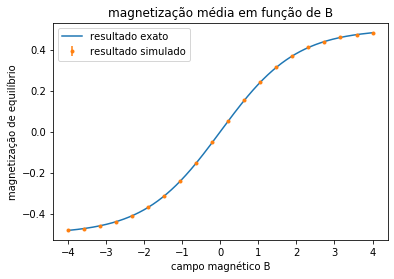

In [14]:
plt.plot(x, m(x), label='resultado exato')
plt.errorbar(B, m1, yerr=sigma, fmt='.', label='resultado simulado')
plt.title("magnetização média em função de B")
plt.ylabel("magnetização de equilíbrio")
plt.xlabel("campo magnético B")
plt.legend()
plt.show()

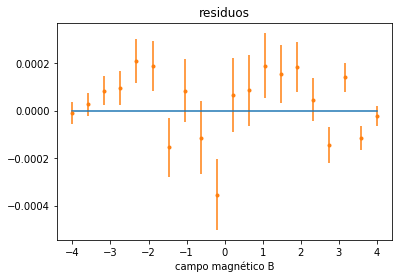

In [15]:
plt.plot(x, m(x)-m(x))
plt.errorbar(B, m(B)-m1, yerr=sigma, fmt='.')
plt.title("residuos")
plt.xlabel("campo magnético B")
plt.show()